# Sci-kit Learn Pracitce

## Part 1: Introduction

Sci-kit is perhaps the most popular and well-known Machine Learning Library.
Using Sci-kit learn tends to follow a similar pattern: we have data that we feed to model, to give us insights on what we are looking for.

Data will typically be split in 2 parts: x and y.
<b>X</b> represents evertyhing to be used to make a prediciton, and <b>Y</b> represents the prediciton we want to make. We feed X into the model so we can get Y.

In [17]:
import sklearn
import matplotlib.pyplot as plt
import pandas as pd

In [18]:
from sklearn.datasets import load_diabetes #sklearn provides us with data sets we can practice on to learn the library

In [19]:
#load_diabetes() #gives you a dictionary
load_diabetes(return_X_y=True) #two arrays

X, y = load_diabetes(return_X_y=True)

X.shape #X has 10 features, with 442 data points
y.shape #Y is what we are trying to predict (the 10 features) ((The true values))

(442,)

### Creating a Model

Phase 1: Create the model (object) <br>
Phase 2: Model learns from the data (fit (x, y)) 

For out example, we will use the sci-kit KNearestNeighbor model tocreate and fit our data.

In [20]:
from sklearn.neighbors import KNeighborsRegressor

mod = KNeighborsRegressor() #creation
mod.fit(X, y) #fitting

pred = mod.predict(X) #makes the predictions

#We can use a different model (Linear Regression instead of KNN), and keep the same formatting

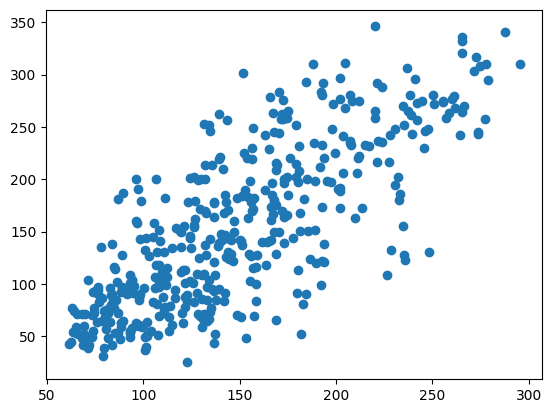

In [21]:
plt.scatter(pred, y)

### Pre-processing

Sometimes it is necessary to preprocess our data. Maybe to scale, etc.

In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

mod = KNeighborsRegressor().fit(X, y)

pipe = Pipeline ([ #creating a pipeline
    ("scale", StandardScaler()), #scale our data first
    ("model", KNeighborsRegressor(n_neighbors=100)) #then run our model
])

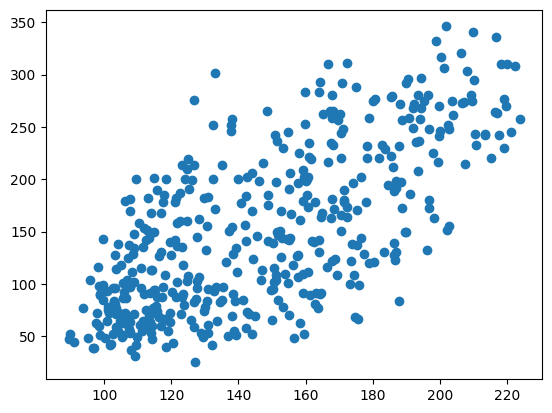

In [25]:
pipe.fit(X,y)
pred = pipe.predict(X)
plt.scatter(pred, y) #didn't change much for us (Why??)

### Training vs Test

We ran into one issue. We are trainting the same data that we are testing on. When we set the KNN to 1, we see why that is an issue. We get a perfect model. Our solution? split the data into 2. Something we can train, and then use the model we get from that to test it on the test data.

To further full-proof it. We can make sure that all points of data are at some point training and testing. We can use a GridSearchCV object from Sklearn to do so.

In [26]:
from sklearn.model_selection import GridSearchCV

pipe.get_params()

neighbors = [9,10,11,12,13,14,15,16]

mod = GridSearchCV(
    estimator = pipe,
    param_grid={'model__n_neighbors': neighbors}, #checks all these values for n neighbors (from 1 to 10)
    cv=3 #cross validation number (3)
)

# All of above is a good representation of what a model is. Iincludes the necessary preprocessing

In [46]:
mod.fit(X, y)
pd.DataFrame(mod.cv_results_) #lets us read out results and for each parameter and cross validation spit

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002266,0.000634,0.002573,0.000987,9,{'model__n_neighbors': 9},0.414191,0.412035,0.528462,0.451563,0.054383,7
1,0.000784,0.000126,0.001463,0.000086,10,{'model__n_neighbors': 10},0.408989,0.405303,0.544371,0.452888,0.064706,6
2,0.000739,0.000129,0.001290,0.000131,11,{'model__n_neighbors': 11},0.405083,0.410036,0.534179,0.449766,0.059723,8
3,0.000585,0.000009,0.001192,0.000008,12,{'model__n_neighbors': 12},0.418767,0.423127,0.540421,0.460772,0.056349,2
4,0.000618,0.000033,0.001323,0.000082,13,{'model__n_neighbors': 13},0.423864,0.418011,0.535469,0.459115,0.054043,4
5,0.000580,0.000005,0.001264,0.000013,14,{'model__n_neighbors': 14},0.428958,0.429049,0.525049,0.461019,0.045276,1
6,0.000569,0.000004,0.001266,0.000015,15,{'model__n_neighbors': 15},0.416147,0.425195,0.525088,0.455476,0.049361,5
7,0.000606,0.000046,0.001385,0.000071,16,{'model__n_neighbors': 16},0.412733,0.430128,0.535380,0.459414,0.054184,3


## Part 2: Preprocessing

It is usally important to transform our input data <i>before</i> using it in our model, in order to get better results.

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("drawndata1.csv")
df.head(3)

,x,y,z
0,58.080365,225.699042,a
1,238.867357,247.456645,a
2,156.218212,286.588782,a


In [4]:
X = df[['x', 'y']].values
y = df['z'] == 'a' #z is what we are trying to predict

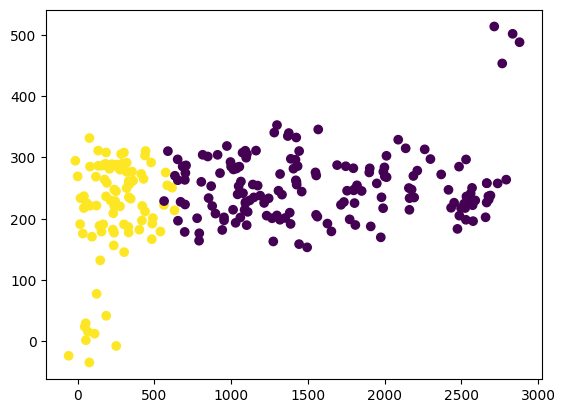

In [9]:
plt.scatter(X[:, 0], X[:, 1], c = y)

What's the issue? The scale of the axes is very difficult, and algorithims tend to be sensitive to things like this.

The solution? <b>scaling</b>

We have some experience with it in the previous part, but this section will go in greater depth.

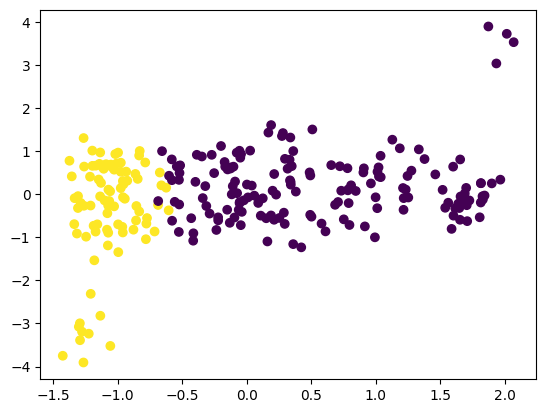

In [12]:
from sklearn.preprocessing import StandardScaler, QuantileTransformer
X_new = StandardScaler().fit_transform(X) #scaling our X

plt.scatter(X_new[:, 0], X_new[:, 1], c = y)

Whilst better, the x and y axis have different spreads. Maybe we can use something else instead of StandardScaler.

We can use quantiles instead of mean in order for outliers to have less of an effect on our scaling. But how do we do this?

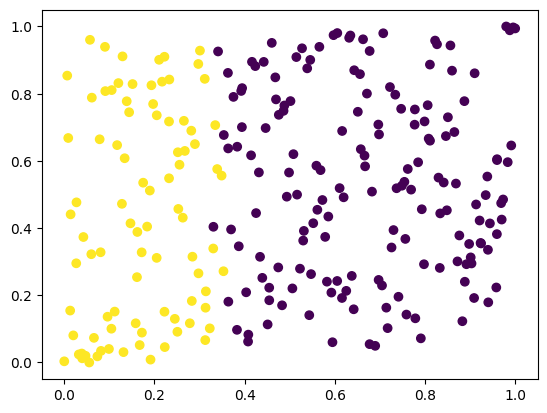

In [14]:
X_new = QuantileTransformer(n_quantiles = 100).fit_transform(X) #scaling our X (using Quantiles instead)
plt.scatter(X_new[:, 0], X_new[:, 1], c = y)

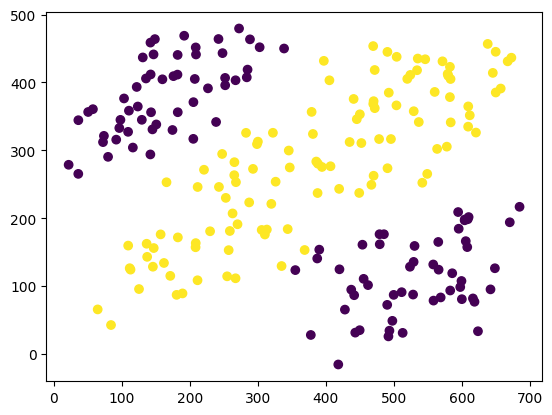

In [ ]:
#new data

df = pd.read_csv("drawndata2.csv")
X = df[['x', 'y']].values
y = df['z'] == 'a'

plt.scatter(X[:, 0], X[:, 1], c = y)

#our new data is not lineraly seperable (prob can't use logistic regression.. right?)

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

pipe = Pipeline([
    ("scale", QuantileTransformer(n_quantiles=100)),
    ("model", LogisticRegression())
])

pred = pipe.fit(X, y).predict(X)
plt.scatter(X[:, 0], X[:, 1], c = pred)

#this isnt what we want, but what if we feed nonlinear features instead of our linear ones into the pipeline?

NameError: name 'QuantileTransformer' is not defined

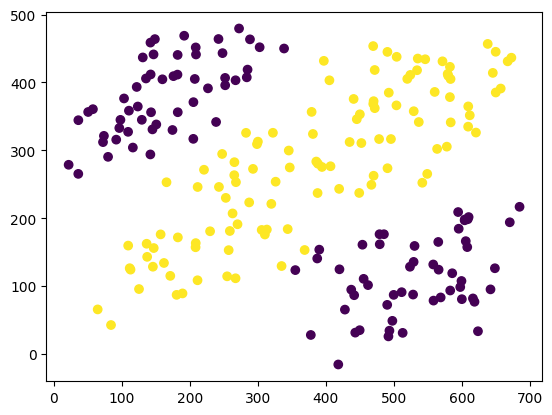

In [ ]:
from sklearn.preprocessing import PolynomialFeatures 

pipe = Pipeline([
    ("scale", PolynomialFeatures()),
    ("model", LogisticRegression())
])

pred = pipe.fit(X, y).predict(X)
plt.scatter(X[:, 0], X[:, 1], c = pred)

#it worked.. but why?

So far we have been doing preprocessing on numerical data, but we can also do the same for catergorical data (One hot encoding)

In [23]:
arr = np.array(['low', 'low', 'high', 'medium']).reshape(-1,1)
arr

array([['low'],
       ['low'],
       ['high'],
       ['medium']], dtype='<U6')

In [30]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(sparse_output =False) #not sparse
enc.fit_transform(arr)

#this is the Y we pass into sklearn

array([[0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.]])

What does the encoder do when we run into a label we don't recognize?

We get a value error, and this is because our <b>OneHotEncoder</b> defaults to not handle unknowns.

In [32]:
enc = OneHotEncoder(sparse_output =False, handle_unknown='ignore') #handle unknown
enc.fit_transform(arr)

enc.transform([['zero']])

array([[0., 0., 0.]])

Use this site to practice preprocessing

https://drawdata.xyz/

## Part 3: Metrics

When we encounter data, we won't just be using one model. How will we know what parameters work best for prediciton unless we test them? We compare the models using a <b>metric</b>. But what metric do we choose? Which one is right?  

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("creditcard.csv")[:80_000] #first 80,000 rows

df.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


In [38]:
X = df.drop(columns=['Time', 'Amount', 'Class']).values
y = df['Class'].values

f"Shape of X={X.shape}, Shape of Y={y.shape}, Fraud Cases = {y.sum()}"

'Shape of X=(80000, 28), Shape of Y=(80000,), Fraud Cases = 196'

Our first model will use logistic regression 

In [42]:
from sklearn.linear_model import LogisticRegression

mod = LogisticRegression(max_iter=1000) #we need more than the deafult iterations
mod.fit(X,y).predict(X).sum()

#we find 151 fraud cases.. but thats not good enough

151

The issue is our data is unbalanced, we have significantly more non-fraud cases than fraud ones. When we run our basic Logistic Regression, we are not getting enough fraud cases. A solution to this is adding <i>class weights</i> to our categories. We can make our model more sensitive to the fraud cases by adding a higher weight.

In [ ]:
mod = LogisticRegression(class_weight = {0: 1, 1: 2}, max_iter=1000) #assigns weight to a class (more weight for the fraud cases)
mod.fit(X,y).predict(X).sum()

#We can use a gridsearch to find the optimal class weight

180

In [ ]:
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(
    estimator = LogisticRegression(max_iter=1000), #our basic model
    param_grid={'class_weight': [{0: 1, 1: v} for v in range(1, 4)]}, #parameter we are testing over
    cv = 4, #cross validations
    n_jobs=-1 #not sure (??)
)

grid.fit(X, y)

GridSearchCV(cv=4, estimator=LogisticRegression(max_iter=1000), n_jobs=-1,
             param_grid={'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 2},
                                          {0: 1, 1: 3}]})

In [ ]:
pd.DataFrame(grid.cv_results_)

#each basic model has its own scoring method, that we can look through it though

lr = LogisticRegression()
??lr.score

# the default metric for scoring isn't exactly what we want.. we need to change it

Signature: lr.score(X, y, sample_weight=None)
Source:   
    def score(self, X, y, sample_weight=None):
        """
        Return the mean accuracy on the given test data and labels.

        In multi-label classification, this is the subset accuracy
        which is a harsh metric since you require for each sample that
        each label set be correctly predicted.

        Parameters
        ----------
        X : array-like of shape (n_samples, n_features)
            Test samples.

        y : array-like of shape (n_samples,) or (n_samples, n_outputs)
            True labels for `X`.

        sample_weight : array-like of shape (n_samples,), default=None
            Sample weights.

        Returns
        -------
        score : float
            Mean accuracy of ``self.predict(X)`` w.r.t. `y`.
        """
        from .metrics import accuracy_score

        return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
File:      /Library/Frameworks/Python.framework/Vers

In [ ]:
from sklearn.metrics import precision_score, recall_score #both handle false psoitives and false negatives (we pick based on what we want)
from sklearn.metrics import make_scorer

grid = GridSearchCV(
    estimator = LogisticRegression(max_iter=1000), #our basic model
    param_grid={'class_weight': [{0: 1, 1: v} for v in np.linspace(1,20,30)]},
    scoring ={'precision': make_scorer(precision_score), 'recall_score': make_scorer(recall_score)}, #changes our scoring metric
    refit = 'precision', #score it optimizes over
    cv = 10, #cross validations
    return_train_score = True, #train scores in our results as well
    n_jobs=-1 #not sure (??)
)

grid.fit(X, y)

pd.DataFrame(grid.cv_results_)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_class_weight,params,split0_test_precision,split1_test_precision,split2_test_precision,split3_test_precision,...,split2_train_recall_score,split3_train_recall_score,split4_train_recall_score,split5_train_recall_score,split6_train_recall_score,split7_train_recall_score,split8_train_recall_score,split9_train_recall_score,mean_train_recall_score,std_train_recall_score
0,2.196004,0.252375,0.031860,0.025584,"{0: 1, 1: 1.0}","{'class_weight': {0: 1, 1: 1.0}}",1.000000,0.463415,0.583333,1.000000,...,0.627119,0.548023,0.573864,0.573864,0.562500,0.613636,0.636364,0.607955,0.612185,0.054733
1,2.118586,0.347189,0.024426,0.014930,"{0: 1, 1: 1.6551724137931034}","{'class_weight': {0: 1, 1: 1.6551724137931034}}",1.000000,0.463415,0.583333,1.000000,...,0.683616,0.627119,0.670455,0.647727,0.630682,0.687500,0.698864,0.687500,0.680239,0.050286
2,2.136249,0.160875,0.019617,0.008328,"{0: 1, 1: 2.310344827586207}","{'class_weight': {0: 1, 1: 2.310344827586207}}",1.000000,0.463415,0.583333,1.000000,...,0.740113,0.683616,0.710227,0.698864,0.687500,0.715909,0.744318,0.727273,0.724454,0.043881
3,1.870477,0.274795,0.022651,0.013419,"{0: 1, 1: 2.9655172413793105}","{'class_weight': {0: 1, 1: 2.9655172413793105}}",1.000000,0.452381,0.583333,1.000000,...,0.785311,0.706215,0.744318,0.732955,0.715909,0.755682,0.772727,0.738636,0.749978,0.039589
4,1.624958,0.197833,0.026774,0.010732,"{0: 1, 1: 3.6206896551724137}","{'class_weight': {0: 1, 1: 3.6206896551724137}}",1.000000,0.452381,0.583333,1.000000,...,0.824859,0.740113,0.755682,0.744318,0.727273,0.778409,0.784091,0.761364,0.771498,0.037959
5,1.788206,0.204572,0.025182,0.012690,"{0: 1, 1: 4.275862068965517}","{'class_weight': {0: 1, 1: 4.275862068965517}}",1.000000,0.452381,0.583333,1.000000,...,0.841808,0.768362,0.778409,0.789773,0.772727,0.789773,0.795455,0.772727,0.792485,0.029289
6,1.858336,0.163180,0.028800,0.028647,"{0: 1, 1: 4.931034482758621}","{'class_weight': {0: 1, 1: 4.931034482758621}}",1.000000,0.452381,0.583333,1.000000,...,0.847458,0.802260,0.789773,0.818182,0.801136,0.801136,0.818182,0.789773,0.812327,0.021063
7,1.758661,0.225276,0.027113,0.010978,"{0: 1, 1: 5.586206896551724}","{'class_weight': {0: 1, 1: 5.586206896551724}}",1.000000,0.452381,0.583333,1.000000,...,0.847458,0.813559,0.829545,0.829545,0.812500,0.806818,0.835227,0.818182,0.827080,0.017190
8,1.808649,0.167852,0.020229,0.008296,"{0: 1, 1: 6.241379310344827}","{'class_weight': {0: 1, 1: 6.241379310344827}}",0.944444,0.452381,0.583333,0.947368,...,0.847458,0.824859,0.846591,0.835227,0.823864,0.829545,0.857955,0.829545,0.838431,0.013974
9,1.917874,0.258744,0.019690,0.006611,"{0: 1, 1: 6.896551724137931}","{'class_weight': {0: 1, 1: 6.896551724137931}}",0.944444,0.452381,0.583333,0.947368,...,0.853107,0.830508,0.846591,0.835227,0.829545,0.835227,0.863636,0.846591,0.844665,0.012015


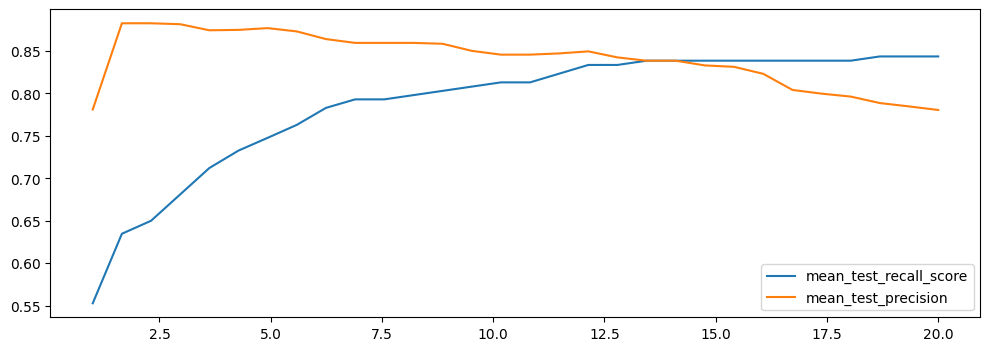

In [73]:
plt.figure(figsize=(12,4))
df = pd.DataFrame(grid.cv_results_)
for score in ['mean_test_recall_score', 'mean_test_precision']:
    plt.plot([_[1] for _ in df['param_class_weight']],
              df[score],
              label=score)
    
plt.legend()

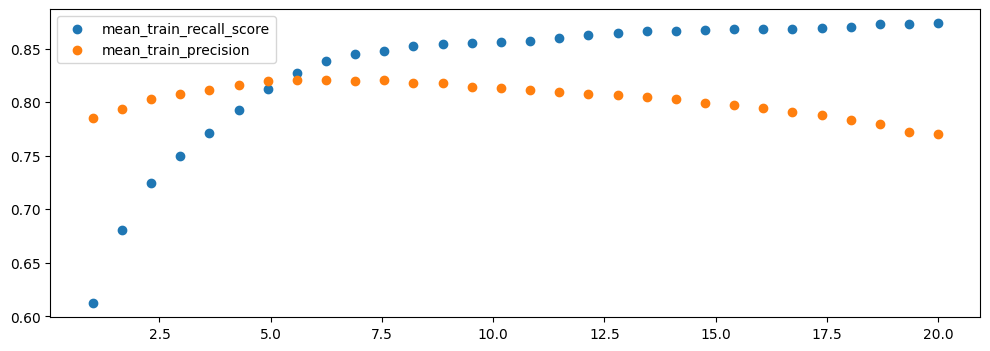

In [74]:
plt.figure(figsize=(12,4))
df = pd.DataFrame(grid.cv_results_)
for score in ['mean_train_recall_score', 'mean_train_precision']:
    plt.scatter(x = [_[1] for _ in df['param_class_weight']],
                y=df[score.replace('test', 'train')],
                label=score
                )
    
plt.legend()

We ran the model over 2 metrics, but how do we pick the single best paraamter? We can create our own metric to pick.

In our example we will create a metric that selects the min of the recall and preicison.

In [75]:
def min_recall_preicision(y_true, y_pred):
    recall = recall_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    return min(recall, precision)

In [77]:
grid = GridSearchCV(
    estimator = LogisticRegression(max_iter=1000), #our basic model
    param_grid={'class_weight': [{0: 1, 1: v} for v in np.linspace(1,20,30)]},
    scoring ={'precision': make_scorer(precision_score),
              'recall_score': make_scorer(recall_score),
              'min_both': make_scorer(min_recall_preicision)
              }, #changes our scoring metric
    refit = 'min_both', #score it optimizes over (our own metric)
    cv = 10, #cross validations
    return_train_score = True, #train scores in our results as well
    n_jobs=-1 #not sure (??)
)

grid.fit(X, y)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


GridSearchCV(cv=10, estimator=LogisticRegression(max_iter=1000), n_jobs=-1,
             param_grid={'class_weight': [{0: 1, 1: 1.0},
                                          {0: 1, 1: 1.6551724137931034},
                                          {0: 1, 1: 2.310344827586207},
                                          {0: 1, 1: 2.9655172413793105},
                                          {0: 1, 1: 3.6206896551724137},
                                          {0: 1, 1: 4.275862068965517},
                                          {0: 1, 1: 4.931034482758621},
                                          {0: 1, 1: 5.586206896551724},
                                          {0: 1, 1: 6.241379310344827},
                                          {0: 1, 1: 6.896551724137931},...
                                          {0: 1, 1: 16.06896551724138},
                                          {0: 1, 1: 16.724137931034484},
                                          {0: 1, 1: 17.379310344827587},
                                          {0: 1, 1: 18.03448275862069},
                                          {0: 1, 1: 18.689655172413794},
                                          {0: 1, 1: 19.344827586206897},
                                          {0: 1, 1: 20.0}]},
             refit='min_both', return_train_score=True,
             scoring={'min_both': make_scorer(min_recall_preicision),
                      'precision': make_scorer(precision_score),
                      'recall_score': make_scorer(recall_score)})

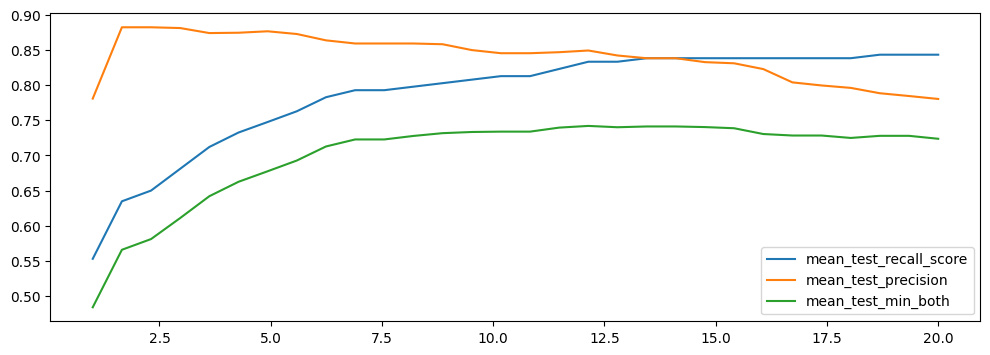

In [ ]:
plt.figure(figsize=(12,4))
df = pd.DataFrame(grid.cv_results_)
for score in ['mean_test_recall_score', 'mean_test_precision', 'mean_test_min_both']:
    plt.plot([_[1] for _ in df['param_class_weight']],
              df[score],
              label=score)
    
plt.legend() 

#Why is the green line lower?

What is the make scorer function?

In [ ]:
s = make_scorer(min_recall_preicision)
??s

#basically fits t onto the gridsearch so its in a format that it can accept
#the sample weight paramter allows you to adjust to weight of rows of data (feature of our data (transc amount, etc.)) (not the same as class weight (fraud vs not fraud))

Signature:       s(estimator, X, y_true, sample_weight=None, **kwargs)
Type:            _PredictScorer
String form:     make_scorer(min_recall_preicision)
File:            /Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_scorer.py
Source:         
class _PredictScorer(_BaseScorer):
    def _score(self, method_caller, estimator, X, y_true, **kwargs):
        """Evaluate predicted target values for X relative to y_true.

        Parameters
        ----------
        method_caller : callable
            Returns predictions given an estimator, method name, and other
            arguments, potentially caching results.

        estimator : object
            Trained estimator to use for scoring. Must have a `predict`
            method; the output of that is used to compute the score.

        X : {array-like, sparse matrix}
            Test data that will be fed to estimator.predict.

        y_true : array-like
            Gold standard targe

We are now rethinking how we are looking at the problem. If we look at fraud as an outlier of transcations, then we can use an outlier detector to see if fraud has occured, instead of a logisitic regression.

In [82]:
from sklearn.ensemble import IsolationForest
mod = IsolationForest().fit(X)
np.where(mod.predict(X) == -1, 1, 0)

array([0, 0, 0, ..., 0, 0, 0])

In [83]:
def outlier_precision(mod, X, y):
    preds = mod.predict(X)
    return precision_score(y, np.where(preds == -1, 1, 0))

def outlier_recall(mod, X, y):
    preds = mod.predict(X)
    return recall_score(y, np.where(preds == -1, 1, 0))

grid = GridSearchCV(
    estimator = IsolationForest(),
    param_grid={'contamination': np.linspace(0.001, 0.02, 10)},
    scoring={'precision': outlier_precision, 'recall': outlier_recall},
    refit='precision',
    cv=5,
    n_jobs=-1
)

grid.fit(X, y)

GridSearchCV(cv=5, estimator=IsolationForest(), n_jobs=-1,
             param_grid={'contamination': array([0.001     , 0.00311111, 0.00522222, 0.00733333, 0.00944444,
       0.01155556, 0.01366667, 0.01577778, 0.01788889, 0.02      ])},
             refit='precision',
             scoring={'precision': <function outlier_precision at 0x17ee982c0>,
                      'recall': <function outlier_recall at 0x17eeb2e80>})

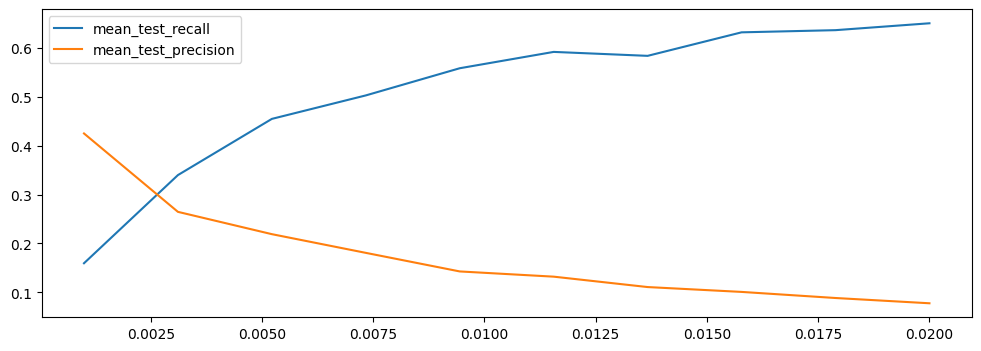

In [ ]:
plt.figure(figsize=(12,4))
df_results = pd.DataFrame(grid.cv_results_)
for score in ['mean_test_recall', 'mean_test_precision']:
    plt.plot(df_results['param_contamination'],
              df_results[score],
              label=score)
    
plt.legend() 

#not quite as good as our logistic regression\

Worth spending time on the sklearn documentation page to see if the metric you wanna test exists.

## Part 4: Meta Estimators

Usually in sklearn we have the following model:

A pipeline contains some preprocessing and featurizing, which we feed into a model. But what if we want to do processing <i>after</i> ?

We want to have an "estimator" that can take the model, and add extra behavior to it.

In [4]:
import numpy as np
import matplotlib.pylab as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.datasets import make_classification

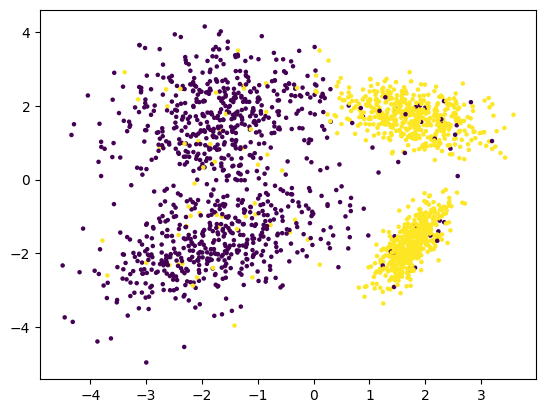

In [6]:
X, y = make_classification(n_samples=2000, n_features=2, n_redundant=0, random_state=21, class_sep=1.75, flip_y=0.1)

plt.scatter(X[:, 0], X[:, 1], c=y, s=5)

In [10]:
# custom function for plotting

def make_plots():
    X_new = np.concatenate([
        np.random.uniform(np.min(X[:, 0]), np.max(X[:, 0]), (20000, 1)),
        np.random.uniform(np.min(X[:, 1]), np.max(X[:, 1]), (20000, 1))
    ], axis=1)
    plt.figure(figsize=(16, 4))
    plt.subplot(141)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=5)
    plt.title("original data")
    plt.subplot(142)
    plt.scatter(X_new[:, 0], X_new[:, 1], c=clf1.predict_proba(X_new)[:, 1], s=5)
    plt.title("ens1")
    plt.subplot(143)
    plt.scatter(X_new[:, 0], X_new[:, 1], c=clf2.predict_proba(X_new)[:, 1], s=5)
    plt.title("ens2")
    plt.subplot(144)
    plt.scatter(X_new[:, 0], X_new[:, 1], c=clf3.predict_proba(X_new)[:, 1], s=5)
    plt.title("ens3");

Based on what we have learned, there are two ways we can approach this. We can use a logistic regression, which essentially puts a line across the dataset where one side represents purple and the other yellow. Or we can us KNN, and base our points on the n-nearest neighbors. While logistic regression feels a bit too general, KNN feels too specific.

How do balance that? Meet the <b>Voting Classifier</b>

You give the Voting Classifier a list of estimators (our different models), and a list of the weights of those estimators.

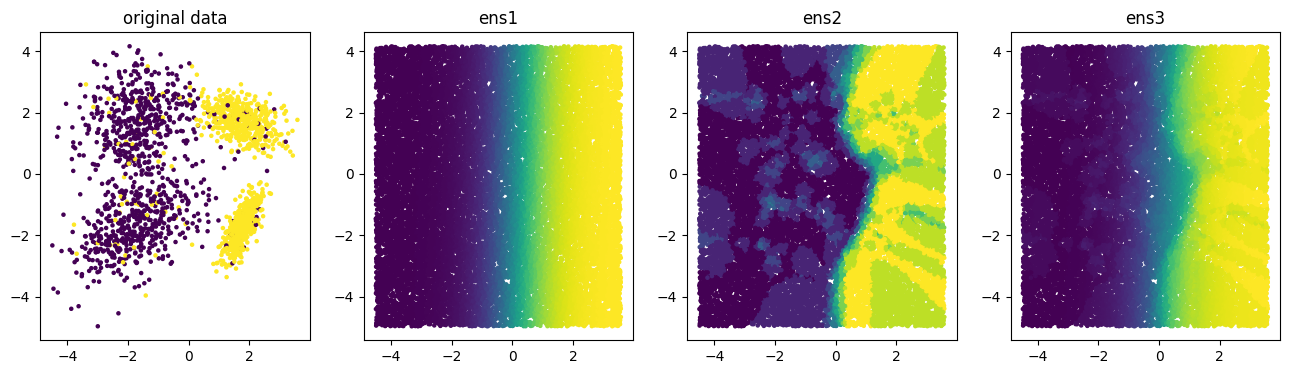

In [ ]:
clf1 = LogisticRegression().fit(X,y) #our first estimator is logistic regression
clf2 = KNeighborsClassifier(n_neighbors=10).fit(X,y) #our second estimator is KNN
clf3 = VotingClassifier(estimators=[('clf1', clf1), ('clf2', clf2)], voting = 'soft',
                        weights = [1, 0.3]) #we can adjust the weights to our liking

clf3.fit(X,y)

make_plots()

In [2]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, accuracy_score, make_scorer

from sklego.meta import Thresholder

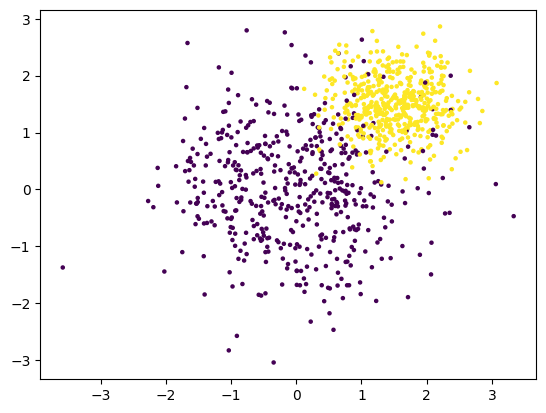

In [32]:
X,y = make_blobs(1000, centers=[(0,0), (1.5,1.5)], cluster_std=[1,0.5]) #another way to make data to practice on 

plt.scatter(X[:,0], X[:,1], c=y, s=5)

The Thresholder object we imported allows us to adjust the threshold at which we classify our data one way or another. A higher threshold for the yellow points for example would move the dividing line the logistic regression would make up towards the top-right corner.

In [10]:
m1 = Thresholder(LogisticRegression(solver='lbfgs'), threshold=0.1).fit(X,y)
m2 = Thresholder(LogisticRegression(solver='lbfgs'), threshold=0.9).fit(X,y)

Text(0.5, 1.0, 'threshold=0.9')

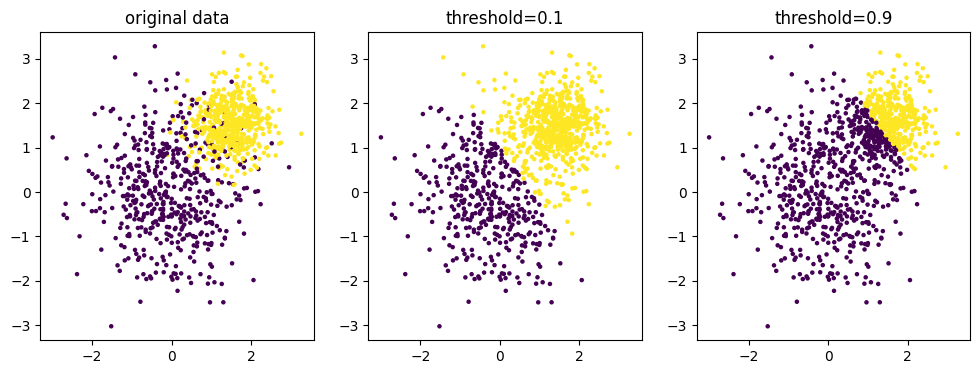

In [13]:
plt.figure(figsize=(12, 4))
plt.subplot(131)
plt.scatter(X[:, 0], X[:, 1], c=y, s=5)
plt.title("original data")
plt.subplot(132)
plt.scatter(X[:, 0], X[:, 1], c=m1.predict(X), s=5)
plt.title("threshold=0.1")
plt.subplot(133)
plt.scatter(X[:, 0], X[:, 1], c=m2.predict(X), s=5)
plt.title("threshold=0.9")

We can input this in Grid Search and compare the accuract, precision and recall as we adjust the threshold.

In [47]:
pipe = Pipeline([
    ("model", Thresholder(LogisticRegression(solver="lbfgs"), threshold=0.1))
])

mod = GridSearchCV(estimator=pipe,
                   param_grid={"model__threshold": np.linspace(0.1,0.9,50)},
                   scoring={"precision":make_scorer(precision_score),
                            "recall": make_scorer(recall_score),
                            "accuracy": make_scorer(accuracy_score)},
                    refit="precision",
                    cv=5
                   )

mod.fit(X,y)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('model',
                                        Thresholder(model=LogisticRegression(),
                                                    threshold=0.1))]),
             param_grid={'model__threshold': array([0.1       , 0.11632653, 0.13265306, 0.14897959, 0.16530612,
       0.18163265, 0.19795918, 0.21428571, 0.23061224, 0.24693878,
       0.26326531, 0.27959184, 0.29591837, 0.3122449 , 0.32857143,
       0.34489796, 0.36122449, 0.37755102, 0.39387755, 0...
       0.58979592, 0.60612245, 0.62244898, 0.63877551, 0.65510204,
       0.67142857, 0.6877551 , 0.70408163, 0.72040816, 0.73673469,
       0.75306122, 0.76938776, 0.78571429, 0.80204082, 0.81836735,
       0.83469388, 0.85102041, 0.86734694, 0.88367347, 0.9       ])},
             refit='precision',
             scoring={'accuracy': make_scorer(accuracy_score),
                      'precision': make_scorer(precision_score),
                      'recall': make_scorer(recall_score)})

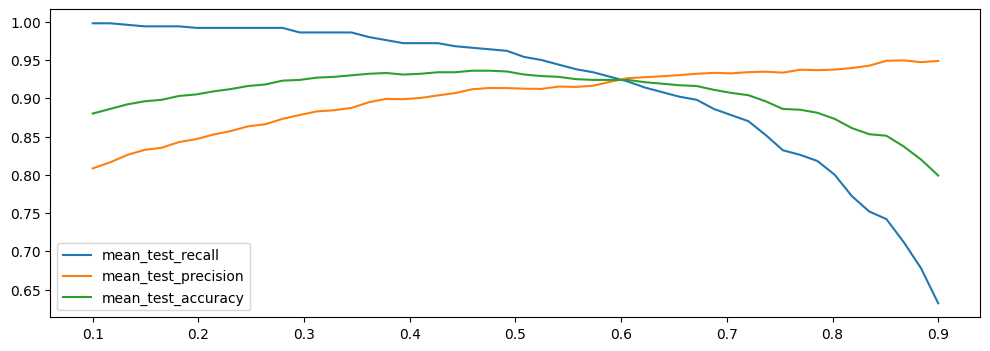

In [48]:
plt.figure(figsize=(12,4))
df_results = pd.DataFrame(mod.cv_results_)
for score in ['mean_test_recall', 'mean_test_precision', 'mean_test_accuracy']:
    plt.plot(df_results['param_model__threshold'],
              df_results[score],
              label=score)
    
plt.legend() 

As we can see from the data, between 0.3<i>ish</i> nd 0.65, there is little change in the accuracy as we adjust the threshold. This lets us know that we can adjust it based on what parameter we think is more important (recall vs precision), and it has little effect on our accuracy.

This is a great example of <b>post-processing</b>. We need the model ready before we can tune it.